In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2

In [2]:
print(tf.__version__)

2.3.0


In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [4]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib
from skimage.filters import laplace
from skimage import io

In [5]:
# C:\Users\patel\Desktop\Mini_Project\dMini_Projectataset\individual\elbow
training_dir = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/forearm/train/"
# testing_dir  = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/elbow/validation/"

print("DATA IMPORTING FROM THE DIRECTORY...")
training_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    validation_split=0.2,
#     rescale = 1./255,
#     horizontal_flip = True,
#     vertical_flip = True,
    rotation_range = 15,
    fill_mode = 'nearest'
)


training_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle=True,
    class_mode = 'categorical',
    batch_size = 32,
    subset= 'training'
)

validation_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 16,
    subset = 'validation'
)
print("DATA LOADED")

DATA IMPORTING FROM THE DIRECTORY...
Found 1461 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
DATA LOADED


In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, MaxPooling2D, Conv2D,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# #Trial 1

# model = Sequential([
#     Conv2D(64, 7, activation='relu',padding='same',input_shape=[224,224,3]),
#     MaxPooling2D(2),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dropout(0.3),
#     Dense(64,activation='relu'),
#     Dropout(0.25),
#     Dense(2,activation='softmax')
# ])

In [8]:
#trial - 2 - EffNetB0
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    input_shape=(256,256,3),
    include_top = False,
    weights = 'imagenet'
)

for layer in base_model.layers[:-22]:
    layer.trainable = False

x = Flatten()(base_model.output)


x = Dropout(0.3)(x)
x = Dense(32,activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(16,activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [10]:
my_callback = EarlyStopping(
    patience=5,
    monitor = 'val_loss',
    min_delta = 0.0005
)
adam = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['acc'])

history = model.fit(
    training_gen,
    epochs = 10,
    validation_data= validation_gen,
)

Epoch 1/10
46/46 [==============================] - 26s 559ms/step - loss: 0.8415 - acc: 0.6454 - val_loss: 3.0009 - val_acc: 0.6951
Epoch 2/10
46/46 [==============================] - 24s 529ms/step - loss: 0.5618 - acc: 0.7447 - val_loss: 2.5497 - val_acc: 0.6868
Epoch 3/10
46/46 [==============================] - 24s 525ms/step - loss: 0.4758 - acc: 0.7864 - val_loss: 1.0378 - val_acc: 0.7582
Epoch 4/10
46/46 [==============================] - 25s 533ms/step - loss: 0.3986 - acc: 0.8220 - val_loss: 0.6843 - val_acc: 0.7720
Epoch 5/10
46/46 [==============================] - 24s 531ms/step - loss: 0.3321 - acc: 0.8487 - val_loss: 0.7463 - val_acc: 0.7940
Epoch 6/10
46/46 [==============================] - 24s 529ms/step - loss: 0.2982 - acc: 0.8754 - val_loss: 0.8412 - val_acc: 0.7692
Epoch 7/10
46/46 [==============================] - 24s 529ms/step - loss: 0.2770 - acc: 0.8912 - val_loss: 0.8592 - val_acc: 0.7747
Epoch 8/10
46/46 [==============================] - 24s 529ms/step - 

In [11]:
import matplotlib.pyplot as plt

In [21]:
model.save_weights('final_foreatm_82.h5')

       loss       acc  val_loss   val_acc
0  0.841463  0.645448  3.000871  0.695055
1  0.561837  0.744695  2.549664  0.686813
2  0.475792  0.786448  1.037810  0.758242
3  0.398598  0.822040  0.684305  0.771978
4  0.332096  0.848734  0.746325  0.793956
5  0.298160  0.875428  0.841227  0.769231
6  0.277007  0.891170  0.859182  0.774725
7  0.250925  0.895962  0.762188  0.780220
8  0.286577  0.885695  1.003870  0.780220
9  0.227945  0.897331  1.021293  0.791209


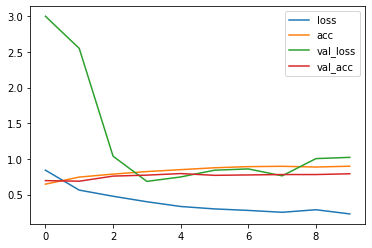

In [12]:
history_df = pd.DataFrame(history.history)
print(history_df)
history_df.plot()
plt.show()

In [14]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import shutil
from tensorflow.keras.applications.efficientnet import preprocess_input

In [15]:
def testing(path):
    files = os.listdir(path)
    df = pd.DataFrame(columns=['patient_id','number_of_images' ,'actual_diagnosis','prediction_negative_array','prediction_positive_array','predicted_diagnosis'])
    for f1 in files:
        file_p_n = os.listdir(path+'/'+f1)
        for f2 in file_p_n:
            p_n_str = f2.split('_')[1]
            img_files = os.listdir(path+'/'+f1+'/'+f2)
            n_imgs = len(img_files)
            pos_array = []
            neg_array = []
            for f3 in img_files:
                img = image.load_img(path+'/'+f1+'/'+f2+'/'+f3,target_size=(256,256))
                img = image.img_to_array(img)
                img = preprocess_input(img)
                img = np.expand_dims(img, axis = 0)
                prediction = model.predict(img)
#                 print(prediction)
                pos_array.append(prediction[0][1])
                neg_array.append(prediction[0][0])
            final_n = np.mean(neg_array)
            final_p = np.mean(pos_array)
            if final_p >= final_n:
                result = 'positive'
            else:
                result = 'negative'
            df = df.append({'patient_id':f1,'number_of_images':n_imgs,'actual_diagnosis':p_n_str,'prediction_negative_array':neg_array,'prediction_positive_array':pos_array,'predicted_diagnosis':result},ignore_index=True)
    return df

In [16]:
forearm_testing = testing("C:/Users/patel/Desktop/Mini_Project/MURA-v1.1/MURA-v1.1/valid/XR_FOREARM")

In [17]:
forearm_testing

,patient_id,number_of_images,actual_diagnosis,prediction_negative_array,prediction_positive_array,predicted_diagnosis
0,patient11188,2,negative,"[0.4137866, 0.7068685]","[0.5862134, 0.29313147]",negative
1,patient11191,3,negative,"[0.75263625, 0.9978179, 0.85716075]","[0.2473638, 0.0021821777, 0.14283924]",negative
2,patient11214,1,negative,[0.8682348],[0.13176517],negative
3,patient11215,2,negative,"[0.87470526, 0.95580214]","[0.12529476, 0.044197865]",negative
4,patient11220,2,positive,"[5.7513553e-05, 4.884325e-11]","[0.99994254, 1.0]",positive
...,...,...,...,...,...,...
128,patient11492,2,negative,"[0.93524206, 0.9890854]","[0.06475796, 0.010914659]",negative
129,patient11493,2,negative,"[0.9572318, 0.4886757]","[0.042768184, 0.5113243]",negative
130,patient11494,2,negative,"[0.010291835, 0.7194052]","[0.9897082, 0.28059483]",positive
131,patient11495,2,negative,"[0.5080938, 0.9873395]","[0.49190626, 0.01266058]",negative


In [20]:
forearm_testing.to_csv('forearm.csv')

In [32]:
elbow_testing_old = testing("C:/Users/patel/Desktop/Mini_Project/MURA-v1.1/MURA-v1.1/valid/XR_ELBOW")
elbow_testing_old

,patient_id,number_of_images,actual_diagnosis,prediction_negative_array,prediction_positive_array,predicted_diagnosis
0,patient11186,5,positive,"[3.2399444e-15, 1.6110454e-05, 0.0032152627, 2...","[1.0, 0.9999839, 0.9967847, 1.0, 1.0]",positive
1,patient11189,4,positive,"[6.736355e-05, 0.9755259, 6.908229e-05, 0.1341...","[0.99993265, 0.024474053, 0.99993086, 0.86580354]",positive
2,patient11204,2,negative,"[0.9391085, 0.99468493]","[0.06089151, 0.005315071]",negative
3,patient11205,3,negative,"[1.0, 0.9999995, 1.0]","[1.857884e-15, 4.531071e-07, 2.4219633e-08]",negative
4,patient11217,3,negative,"[0.6858675, 0.8333576, 0.41769716]","[0.3141325, 0.16664244, 0.5823028]",negative
...,...,...,...,...,...,...
153,patient11877,4,negative,"[0.9102379, 0.7406913, 0.99509203, 0.9252838]","[0.089762025, 0.25930876, 0.0049079224, 0.0747...",negative
154,patient11878,2,negative,"[0.27257767, 0.9921738]","[0.7274223, 0.007826257]",negative
155,patient11879,2,negative,"[0.97414213, 0.60500556]","[0.025857888, 0.39499438]",negative
156,patient11880,3,negative,"[0.9999554, 0.99999845, 1.0]","[4.4560522e-05, 1.5041745e-06, 3.3460468e-10]",negative


In [18]:
# df1 = pd.read_csv('elbow_eff_83.csv')
df1 = forearm_testing
cnt = 0
for i in range(133):
    if df1.iloc[i]["actual_diagnosis"] == df1.iloc[i]['predicted_diagnosis']:
        cnt+=1

print("Accuracy :",(cnt/133)*100)

Accuracy : 81.95488721804512


In [33]:
# df1 = pd.read_csv('elbow_eff_83.csv')
df2 = elbow_testing_old
cnt = 0
for i in range(158):
    if df2.iloc[i]["actual_diagnosis"] == df2.iloc[i]['predicted_diagnosis']:
        cnt+=1

print("Accuracy :",(cnt/158)*100)

Accuracy : 82.91139240506328


In [25]:
elbow_testing_pre_new[elbow_testing_pre_new['actual_diagnosis'] != elbow_testing_pre_new['predicted_diagnosis']]

,patient_id,number_of_images,actual_diagnosis,prediction_negative_array,prediction_positive_array,predicted_diagnosis
15,patient11287,3,negative,"[0.4361907, 0.20778014, 0.3693628]","[0.56380934, 0.7922199, 0.63063717]",positive
16,patient11312,2,positive,"[0.3098835, 0.81696564]","[0.69011647, 0.18303435]",negative
24,patient11349,2,negative,"[2.063751e-08, 0.017202245]","[1.0, 0.98279774]",positive
25,patient11358,3,positive,"[0.8465584, 0.87451786, 0.92005926]","[0.15344164, 0.12548217, 0.07994078]",negative
26,patient11368,2,negative,"[0.107223764, 0.8379831]","[0.89277625, 0.16201691]",positive
35,patient11414,2,positive,"[0.89811414, 0.123158656]","[0.10188585, 0.87684137]",negative
36,patient11417,2,positive,"[0.9758744, 0.26816744]","[0.024125498, 0.73183256]",negative
37,patient11417,2,positive,"[0.986548, 0.9925137]","[0.013452009, 0.0074863154]",negative
42,patient11472,3,positive,"[0.9475774, 0.09442733, 0.67653984]","[0.05242265, 0.9055727, 0.32346013]",negative
63,patient11736,2,negative,"[1.07348715e-05, 0.00043068704]","[0.9999893, 0.99956936]",positive


In [24]:
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(133):
    if (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        tp += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="negative"):
        fn += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "negative") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        fp += 1
    else:
        tn +=1

In [25]:
print("True Positive :", tp)
print("True Negative :", tn)
print("False Positive :", fp)
print("False Negative :", fn)


True Positive : 47
True Negative : 62
False Positive : 7
False Negative : 17
